In [1]:
import tensorflow as tf
import os

In [6]:
# following code privent the code from captrint all gpu https://www.youtube.com/watch?v=jztwpsIzEGc
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
import cv2
#help to read all image extension
import imghdr

In [8]:
data_dr="data"

In [9]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
# excise sub folder inside data dir
os.listdir(data_dr)
# it will show all image  inside happy folder
os.listdir(os.path.join(data_dr,'happy'))

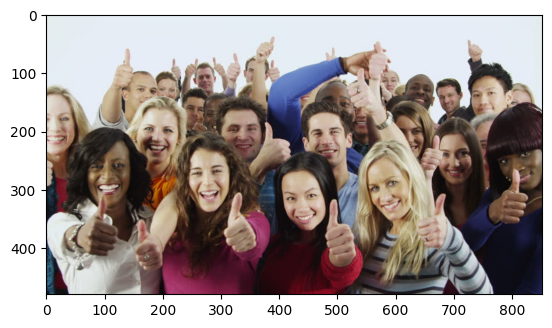

In [26]:
# to see image :
img=cv2.imread(os.path.join(data_dr,'happy','3.jpg'))
img.shape
#to plot image:
from matplotlib import pyplot as plt
# this will shoe image in BGR
plt.imshow(img) 
# to see image in RGB 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 
        

In [28]:
# it remove darty data
for image_class in os.listdir(data_dr):
    for image in os.listdir(os.path.join(data_dr,image_class)):
        image_path=os.path.join(data_dr,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip =imghdr.what(image_path)
            if tip not in image_exts:
                print('issue with image ',format(image_path)) 
                os.remove(image_path)
        except Exception as e:
            print('issue with image ',format(image_path))        

In [29]:
#load data
import numpy as np
import pandas as pd

In [88]:
# this data looding methord help to reshap all  in 255,255,3 shap.
# data = tf.keras.utils.image_dataset_from_directory(data_dr,batch_size=15,image_size=(128, 128))
data = tf.keras.utils.image_dataset_from_directory(data_dr)
# tf.keras.utils.image_dataset_from_directory??

Found 343 files belonging to 2 classes.


In [50]:
#to excise liise array we have to  convert into array data[0]
data_iterator=data.as_numpy_iterator()

In [51]:
batch =data_iterator.next()

In [52]:
#images 
batch[0]
#label
batch[1]

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

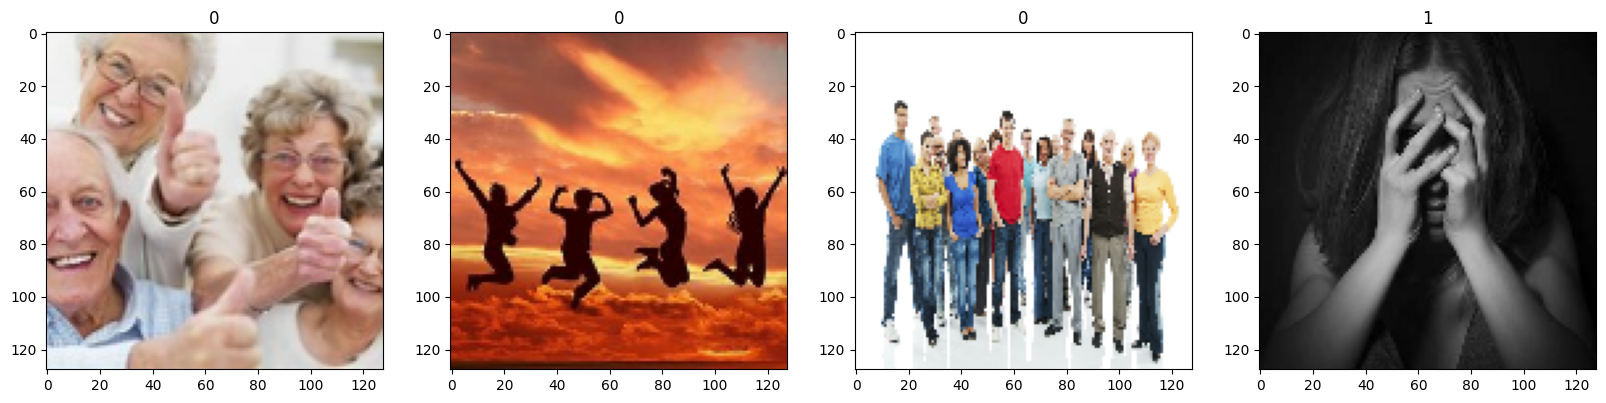

In [53]:
# to know which simbole represent which part:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx ,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# sad 1, happy 0    

In [89]:
#preprocessing
#1.scale data .we convet all value in range 0 to 1
data=data.map(lambda x,y: (x/255, y))

In [90]:
print ("max",data.as_numpy_iterator().next()[0].max(),"min",
data.as_numpy_iterator().next()[0].min())

max 1.0 min 0.0


In [110]:
batch=data.as_numpy_iterator().next()
batch[0].shape

(32, 256, 256, 3)

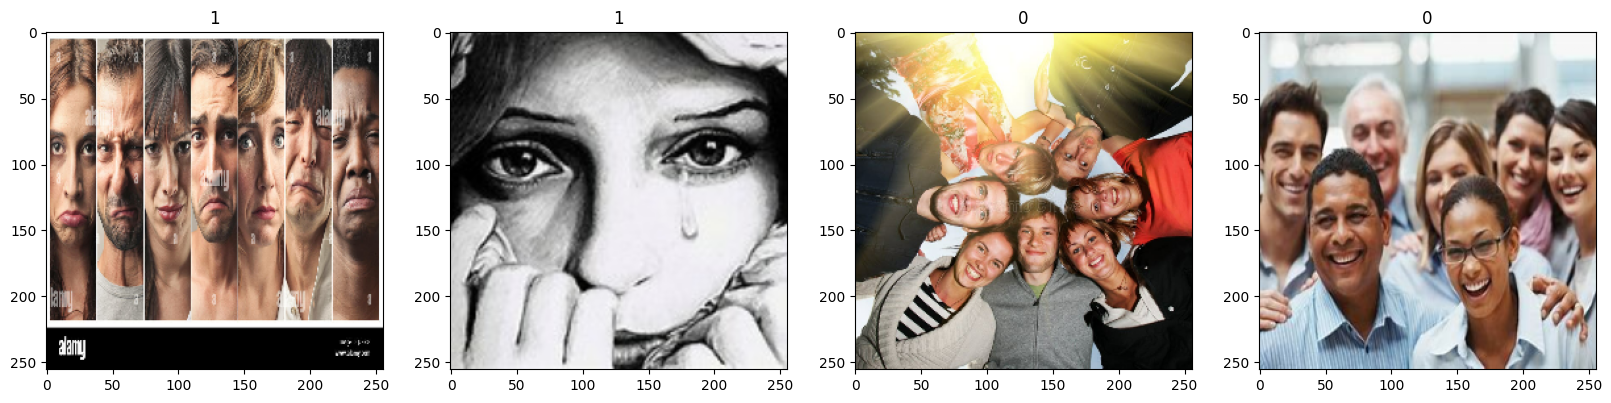

In [92]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx ,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [105]:
#split data
train_size=int(len(data)*.7)
val_size= int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [106]:
len(data)==train_size+val_size+test_size

True

In [111]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [112]:
len(train)

7

In [113]:
# thera are to modal sequential .function .function are more complex and more accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [115]:
model=Sequential()

In [116]:
# 16 is filter,3,3 is shape,1is shift
model.add(Conv2D(16,(3,3),1, activation ='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1, activation ='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1, activation ='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [117]:
#adam is optimizer 
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [119]:
#train
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 11s 1s/step - loss: 0.8827 - accuracy: 0.5625 - val_loss: 0.6608 - val_accuracy: 0.6562
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.5628 - accuracy: 0.7143 - val_loss: 0.6061 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.5662 - accuracy: 0.7009 - val_loss: 0.4619 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 26s 3s/step - loss: 0.5270 - accuracy: 0.7321 - val_loss: 0.5931 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 26s 3s/step - loss: 0.4819 - accuracy: 0.7723 - val_loss: 0.4022 - val_accuracy: 0.7812
Epoch 6/20
7/7 [==============================] - 27s 3s/step - loss: 0.5234 - accuracy: 0.7143 - val_loss: 0.5256 - val_accuracy: 0.7188
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: 0.4940 - accuracy: 0.7768 - val_loss: 0.4558 - val_accuracy: 0.8125
Epoch 8/20
7/7 [=============================

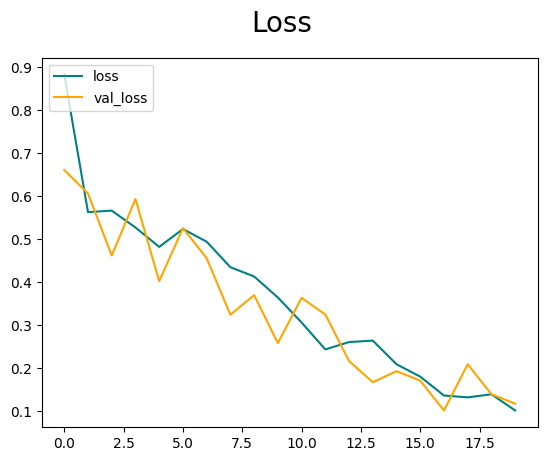

In [120]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

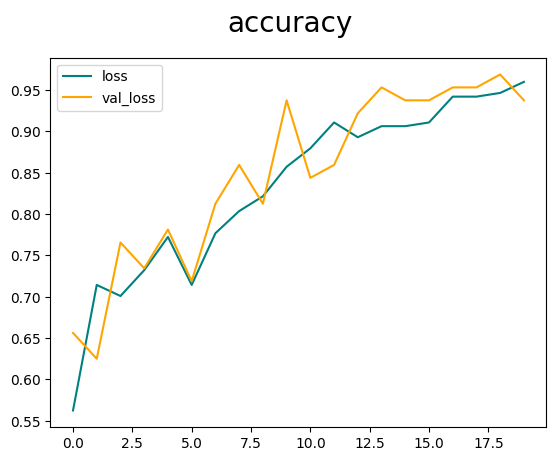

In [122]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_loss')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [123]:
# test profromence
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [124]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [127]:
for a in test.as_numpy_iterator():
    X,y=a
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 255ms/step


In [128]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, accoracy:{acc.result().numpy()}')

Precision:0.9047619104385376, Recall:1.0, accoracy:0.9636363387107849


In [129]:
# save this model
from tensorflow.keras.models import load_model
model.save(os.path.join("model","happysadmodel"))

INFO:tensorflow:Assets written to: model\happysadmodel\assets


INFO:tensorflow:Assets written to: model\happysadmodel\assets


In [131]:
# to import model 
new_model =load_model(os.path.join("model","happysadmodel"))